# Importando as Bibliotecas
Para explicar passo a passo, começarei importando o que já sei que vou precisar.

Nesse caso precisarei de uma fonte de dados, que usarei o Yahoo Finance, e o Matplotlib, uma biblioteca para visualização de dados das séries dos ativos escolhidos.

In [ ]:
# Instalando o Yahoo Finance

!pip install yfinance

     |████████████████████████████████| 5.5MB 10.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=3c5d2a3dbec3b14f0e60d511eb936c4a40bd10f888ce8cd163eb62e55d68d5a9
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Importando bibliotecas que precisarei

# biblioteca do Yahoo Finance
import yfinance as yf

# Importando o que precisaremos especificamente
# https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm
import matplotlib.pyplot as plt



# Obtendo Dados da VALE3

Criamos um dataframe e nomeamos 'serie_vale'.

Para pegar esses dados, nesse caso, utilizei o yahoo finance. Ele me pede argumentos como 'ticker' (código do ativo), start (período de início da série), end (período final da série). Há outros, mas não vamos nos aprofundar. Aproveitei esse método e já arredondei os valores (rounding=True).

Um outro método poderia ser utilizando uma função do numpy (np.round) onde podemos escolher até o número de casas decimais.

In [ ]:
# Vamos 'puxar' os dados da VALE, que utilizaremos para criar nosso gráfico

serie_vale = yf.download('VALE3.SA', start='2015-01-01', end='2020-09-21', rounding=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
type(serie_vale)

pandas.core.frame.DataFrame

In [ ]:
# O head() nos permite visualizar as primeiras linhas do dataframe e assim termos uma ideia de como o mesmo está
# Note que ao inserir o número 5 retornou para mim as cinco primeiras linhas do DataFrame

serie_vale.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,21.70,21.95,21.06,21.28,17.27,5658400
2015-01-05,20.76,21.13,20.51,20.96,17.01,8603000
2015-01-06,21.07,22.13,21.07,21.80,17.69,9879900
2015-01-07,22.32,22.81,21.97,22.60,18.34,6130900
2015-01-08,22.77,22.88,22.11,22.84,18.54,4667300


## Desenvolvendo a Visualização dos Dados da VALE3

Agora vamos utilizar o Matplotlib, onde utilizo diversos métodos para customizar essa visualização e dentro desses métodos insiro argumentos.

Fiz algumas modificações que não precisariam ser feitas, mas achei interessante para fins de estudo e entendimento do que é possível fazer, como mudança da cor da linha, do título, customização do eixo X e do eixo Y, tamanho de fonte, dentre outros.

Ao mesmo tempo em que busquei mexer um pouco no gráfico, também acho interessante não me aprofundar tanto para não confundir e para que você busque mais informações sobre.

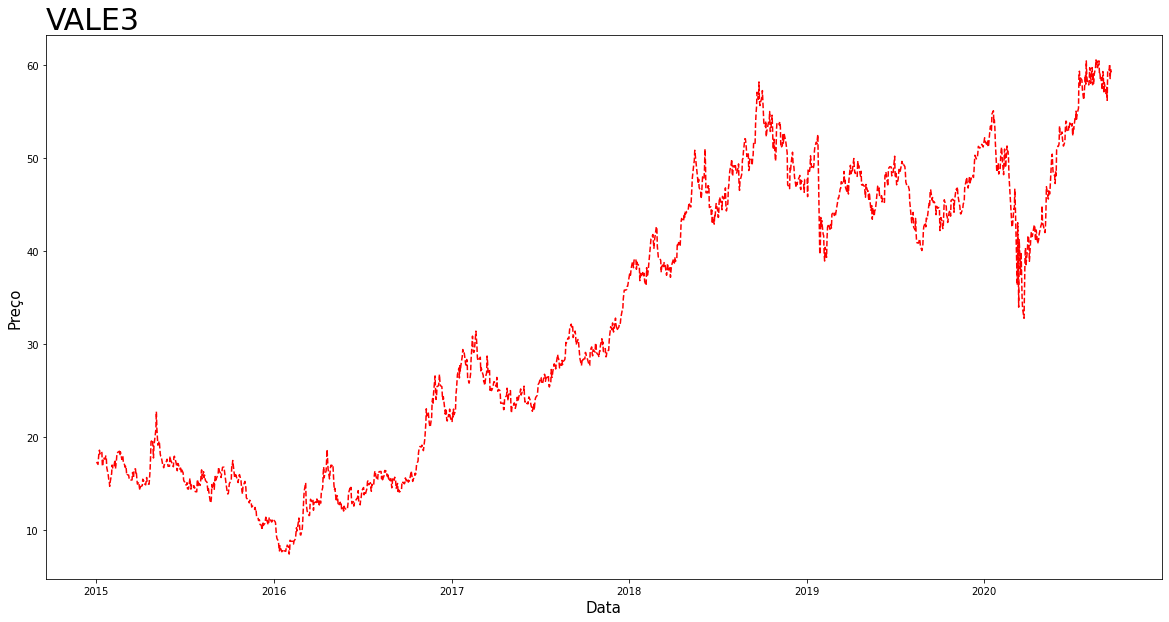

In [ ]:
plt.figure(figsize=(20,10),facecolor='white')
plt.plot(serie_vale['Adj Close'], 'r--')
plt.title('VALE3', fontsize=30, loc='Left')
plt.xlabel('Data', fontsize=15)
plt.ylabel('Preço', fontsize=15)
plt.show()

## Indo Um Pouco Além: Normalização a 100

Como é possível ver, o trabalho é razoavelmente simples para um iniciante. Por isso eu quis mostrar algo a mais.

Agora que plotamos um gráfico com um ativo, vamos um pouco além para que eu possa mostrar uma maneira de comparar dois (ou mais) ativos no mesmo gráfico e também utilizar a normalização a 100 para que os preços no gráfico tenham o mesmo ponto de partida.

Isso permite que realizemos uma análise melhor da comparação dos dois ativos em questão, uma vez que sem a normalização eles têm valores diferentes.

Para isso, vamos obter os dados da PETR4.

In [ ]:
# Mesmo procedimento de obtenção dos dados

serie_petr = yf.download('PETR4.SA', start='2015-01-01', end='2020-09-21', rounding=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
serie_petr.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,9.99,9.99,9.35,9.36,8.68,49559500
2015-01-05,9.14,9.19,8.53,8.56,7.94,78385100
2015-01-06,8.71,8.83,8.04,8.28,7.68,84723300
2015-01-07,8.56,8.73,8.36,8.67,8.04,85531000
2015-01-08,8.79,9.39,8.74,9.23,8.56,83306300


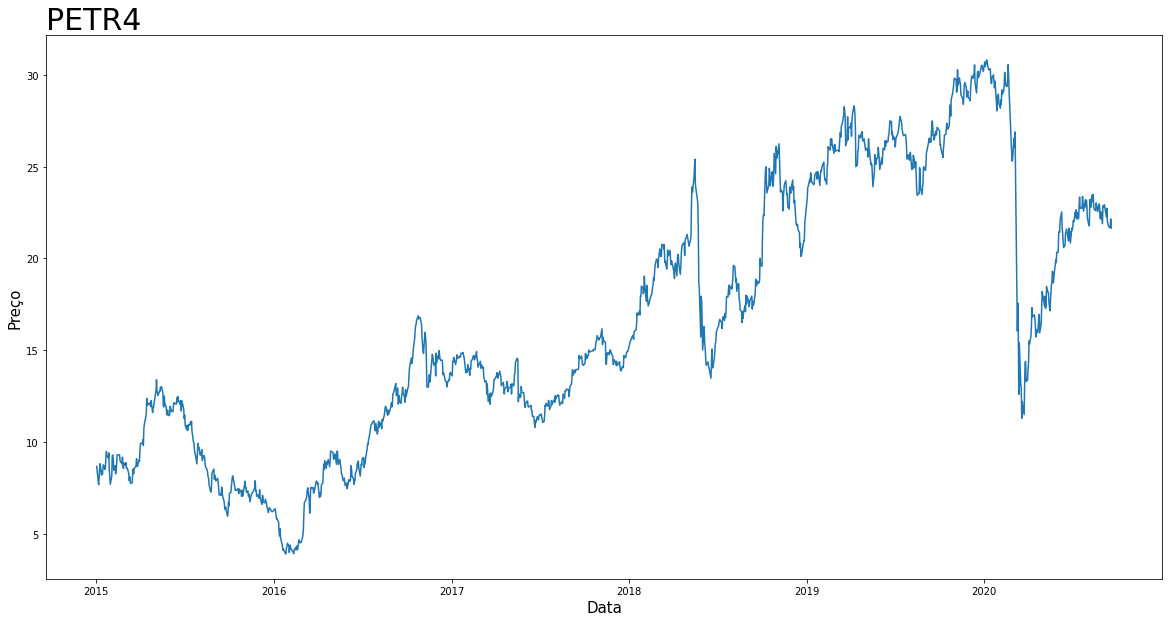

In [ ]:
# Gráfico da PETR4
# Aqui deixei com a cor padrão da linha

plt.figure(figsize=(20,10), facecolor='white')
plt.plot(serie_petr['Adj Close'])
plt.title('PETR4', fontsize=30, loc='Left')
plt.xlabel('Data', fontsize=15)
plt.ylabel('Preço', fontsize=15)
plt.show()

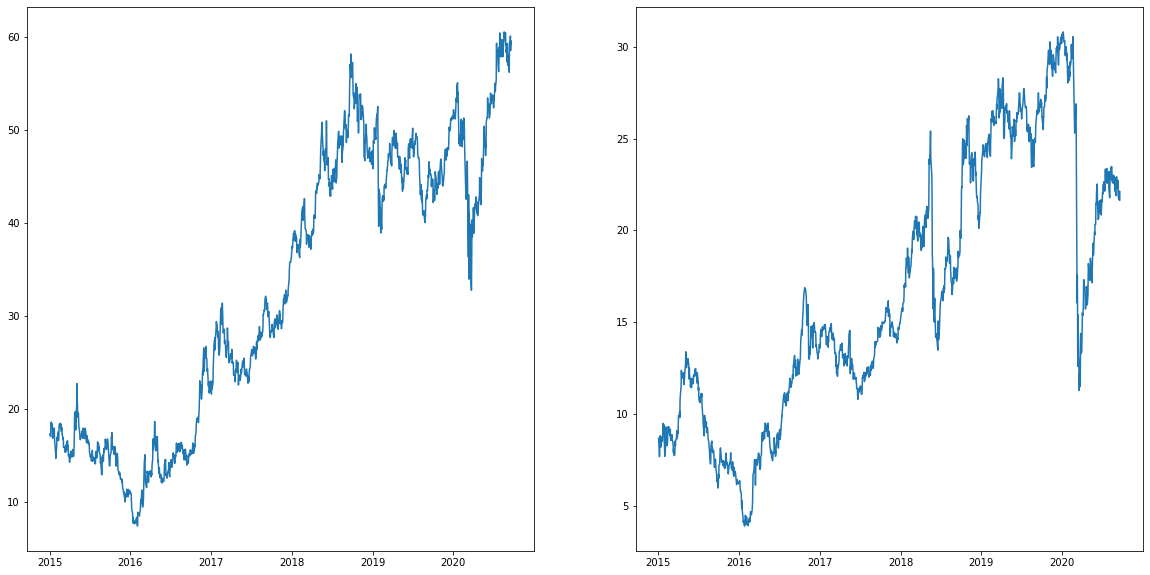

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1,)
plt.plot(serie_vale['Adj Close'])
plt.subplot(1, 2, 2)
plt.plot(serie_petr['Adj Close'])

# Colocando Os Dados Das Duas Ações em Um DataFrame

Como estou utilizando o Fechamento Ajustado (Adj Close) como parâmetro em meus gráficos, vou colocar ambos em um df para que você veja uma maneira de fazê-lo.

Insiro especificamente a coluna que quero de cada série e adiciono '.T' pois meu dataframe estava com os fechamentos ajustados como linhas e não colunas.

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame((serie_vale['Adj Close'],serie_petr['Adj Close'])).T

In [ ]:
df.head()

,Adj Close,Adj Close
Date,,
2015-01-02,17.27,8.68
2015-01-05,17.01,7.94
2015-01-06,17.69,7.68
2015-01-07,18.34,8.04
2015-01-08,18.54,8.56


In [ ]:
# Utilizando esse método podemos alterar os nomes das colunas

df.columns = ['Fech VALE3', 'Fech PETR4']
df.head()

,Fech VALE3,Fech PETR4
Date,,
2015-01-02,17.27,8.68
2015-01-05,17.01,7.94
2015-01-06,17.69,7.68
2015-01-07,18.34,8.04
2015-01-08,18.54,8.56


## Finalmente, normalizando Preço das Ações a 100
A fórmula utilizada é: $ Pt/P0 * 100 $

Dessa forma, dividiremos o preço de uma determinada data pelo primeiro número e o quociente será multiplicado por 100.

Logo, o primeiro número (P0) dividido por ele mesmo e multiplicado por 100 será igual a 100, independente da ação.

Com isso, ambos os preços desses ativos iniciarão em 100.

In [ ]:
# Para selecionarmos o preço '0' utilizamos o método iloc.
# Ele extrairá o primeiro valor da tabela.

df.iloc[0]

Fech VALE3    17.27
Fech PETR4     8.68
Name: 2015-01-02 00:00:00, dtype: float64

## Plotagem da Comparação Normalizada a 100
Abaixo coloco os dois ativos no mesmo gráfico, adiciono título, rótulo (label) para o eixo X e para o eixo Y e aproveito para mostrar como mudar as legendas.

Abaixo do gráfico normalizado a 100 plotei os preços sem utilizar a fórmula para que seja possível ver a diferença.


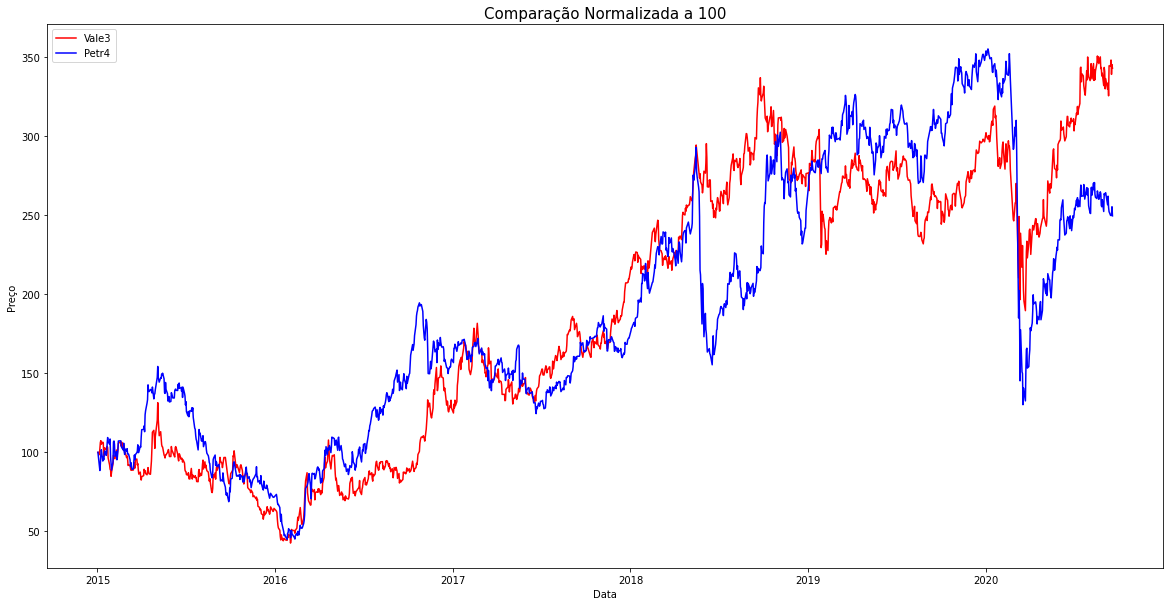

In [ ]:
plt.figure(figsize=[20,10],facecolor='white')
plt.plot((df['Fech VALE3'] / df['Fech VALE3'].iloc[0] * 100),color='red')
plt.plot((df['Fech PETR4'] / df['Fech PETR4'].iloc[0] * 100),color='blue')
plt.title('Comparação Normalizada a 100',fontsize=15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend(['Vale3','Petr4'])
plt.show()

### Visualizando as Séries Sem a Normalização a 100

Note como muda a análise uma vez que cada ação parte de um valor diferente.

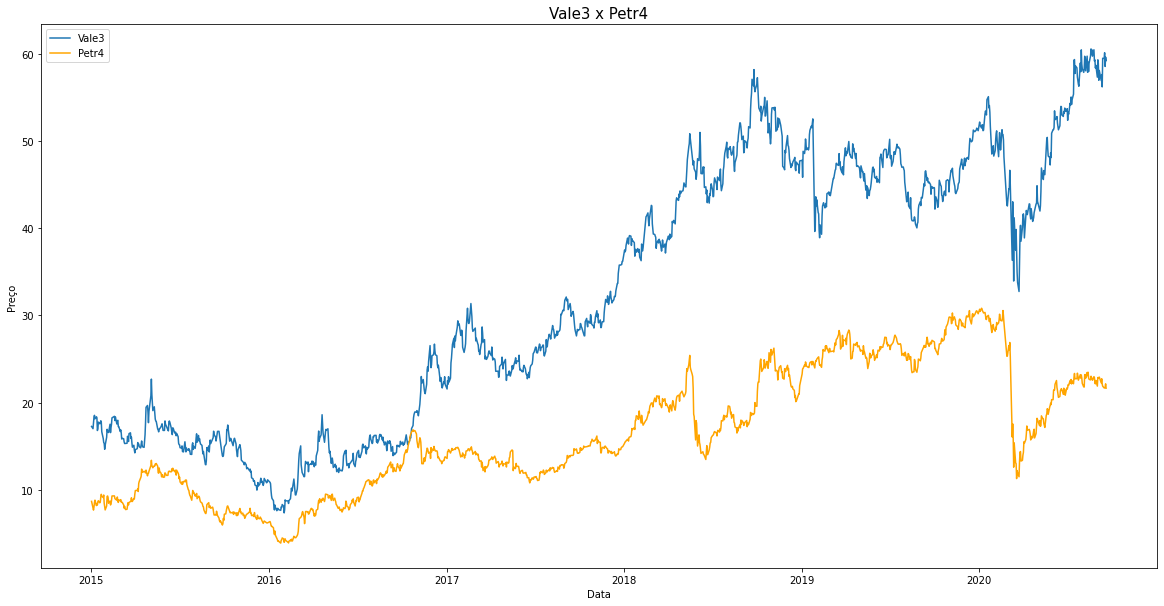

In [ ]:
plt.figure(figsize=[20,10],facecolor='white')
plt.plot(serie_vale['Adj Close'])
plt.plot(serie_petr['Adj Close'], color='orange')
plt.title('Vale3 x Petr4', fontsize=15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend(['Vale3','Petr4'])
plt.show()

## O Que Podemos Observar
Uma vez normalizado a 100 podemos ter uma base adequada para comparar a evolução de cada ação.

Utilizando o contexto de pandemia, podemos notar, com base apenas no que fizemos, que a PETR4 sofreu mais com o covid-19 e que também teve uma recuperação menor. Os motivos disso pode ser tema para outro artigo.

Note que em algumas ocasiões ambos ativos caem ou sobem juntos e em outras apenas um cai/sobe. Isso nos leva a outro tema bom para abordar, que é  mostrar a diferença entre risco sistemático e não-sistemático e a importância da diversificação de portfólio.

# Conclusão
Se você possui conhecimento de Python e suas bibliotecas é razoavelmente simples dar início a análises e outros projeto mais aprofundados na área de Mercado Financeiro.

Esse artigo servirá como ponto de partida para novas publicações. Espero que tenha gostado e acompanhe as futuras postagens!